In [128]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)

#앙상블
from sklearn.ensemble import VotingClassifier

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

#이거 임포트 해줘야 차트에서 오류안남!!! 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
#font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

## 문제 정의
서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을
강동, 강서, 강남, 강북으로 분류해보는 예제입니다.

## 데이터 수집
아래는 서울의 대표적인 구(district) 위치 데이터입니다.
구(district) 정보는 학습에 사용하도록 하겠습니다.

## 컬럼 주석
district: 행정구역 (서초구, 송파구, 용산구 등, 서울의 단위 지역 분류입니다)
dong: 구(district)보다 작은 행정구역 (대치동, 도곡동, 암사동 등, 서울의 소단위 분류입니다)
longitude: 경도
latitude: 위도
label: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭

In [129]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

In [130]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [131]:
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인
train_df.label.value_counts()

Gangbuk     5
Gangnam     5
Gangdong    5
Gangseo     5
Name: label, dtype: int64

In [132]:
test_df.label.value_counts()

Gangbuk     5
Gangnam     5
Gangdong    5
Gangseo     5
Name: label, dtype: int64

In [133]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [134]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


In [135]:
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


In [136]:
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

In [137]:
train_df.head()

,longitude,latitude,label
0,126.849500,37.551000,Gangseo
1,126.855396,37.524240,Gangseo
2,126.887400,37.495400,Gangseo
3,126.902000,37.451900,Gangseo
4,126.908728,37.560229,Gangseo


In [138]:
test_df.head()

,longitude,latitude,label
0,126.854547,37.489853,Gangseo
1,126.859245,37.501394,Gangseo
2,126.847951,37.537759,Gangseo
3,126.815719,37.575817,Gangseo
4,126.891620,37.577039,Gangseo


## 데이터 시각화
데이터를 특징을 바탕으로 한 공간에 데이터 특징을 시각화함으로써,
우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있고,
데이터의 패턴을 눈으로 쉽게 파악할 수 있습니다.

Text(0.5, 1, 'district visualization in 2d plane')

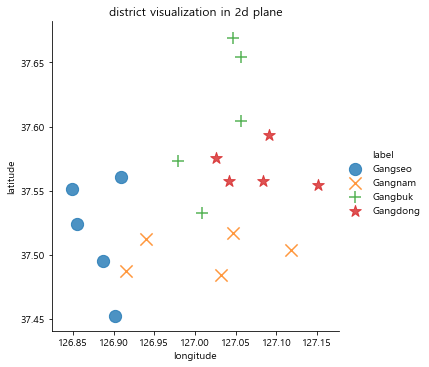

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 경도, 위도에 따른 데이터 시각화
sns.lmplot('longitude', 'latitude', data=train_df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x", "+", "*"],
           hue="label")

# title
plt.title('district visualization in 2d plane')

In [140]:
def display_decision_surface(clf,X, y):
    
    # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # 학습 데이터를 챠트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, 
                    X.loc[idx].latitude, 
                    c=color, 
                    label=le.classes_[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=200)

    # 챠트 제목
    plt.title("Decision surface of a decision tree",fontsize=16)
    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude',fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude',fontsize=16)
    # 챠트 크기 설정
    plt.rcParams["figure.figsize"] = [7,5]
    # 챠트 폰트 크기 설정
    plt.rcParams["font.size"] = 14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14

    # 챠트 그리기
    plt.show()

## 파라미터 없이 학습한 모델의 결정 표면 시각화
의사결정트리는 오버피팅되기 상당히 쉬운 모델입니다.
별도의 파라미터를 설정해주지 않을 경우, 최대한 학습데이터에만 잘 맞게 모델이 형성됩니다 (오버피팅).
아래 챠트를 통해, 학습된 모델이 강남, 강북, 강동, 강서 지역 구분이라기 보다는,
단순히 학습 데이터 구분에만 집중된 모델임을 볼 수 있습니다.

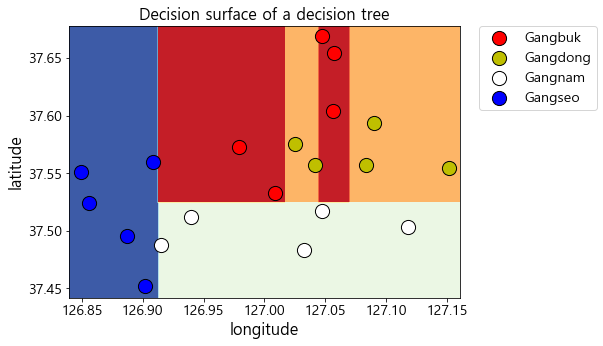

In [143]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
# pyplot은 숫자로 표현된 레이블을 시각화할 수 있음
# LabelEncoder로 레이블을 숫자로 변경
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)

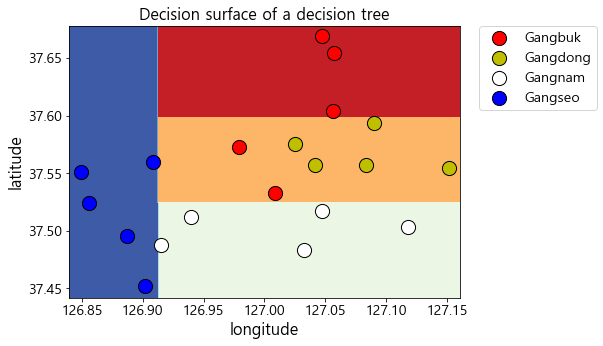

In [144]:
clf = tree.DecisionTreeClassifier(max_depth=3, 
                                  min_samples_split=3,
                                  min_samples_leaf=3, 
                                  random_state=5).fit(X_train, y_encoded.ravel())
display_decision_surface(clf,X_train, y_encoded)


In [58]:
#원하는 장소 3개를 넣어서 맞는지 맞추어 보세요!
#(3개 장소 시리즈로 넣어서)

In [59]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [60]:
X_train.shape, y_train.shape

((20, 2), (20, 1))

In [61]:
X_test.shape, y_test.shape

((20, 2), (20, 1))

In [62]:
#single model
#각 모델의 객체 생성

In [93]:
dtree = DecisionTreeClassifier(
#하이퍼파라메터를 넣어보자.
    criterion='entropy',
    max_depth=10,
    random_state=35
)

In [94]:
knn = KNeighborsClassifier(
    n_neighbors=10,
    n_jobs=None#CPU수.None=있는거 다 쓰기.
)

In [95]:
svm = SVC(
    C=0.1,
    gamma=0.003,#곡선의 휘어진 정도
    kernel='rbf',#직선,곡선 중 택1 각각의 하이퍼파라메터가 다르다.rbf=곡선,linear=직선
    probability=True#각 라벨링 값으로 될 가능성 구해주세요!
)

In [96]:
dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

In [97]:
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

In [98]:
svm.fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [99]:
print('accuracy=======================================')
print('dtree>> ',accuracy_score(y_test, dtree_predicted))
print('knn>> ',accuracy_score(y_test, knn_predicted))
print('svm>> ',accuracy_score(y_test, svm_predicted))

accuracy=======================================
dtree>>  0.95
knn>>  0.9
svm>>  0.95


In [102]:
dtree_proba = dtree.predict_proba(X_test)
dtree_proba[:3]
#3번째 숫자가 1일확률 100프로

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [103]:
knn_proba = knn.predict_proba(X_test)
knn_proba[:3]#3번째 숫자가 1일확률이 0.5로 가장 큼

array([[0.2, 0. , 0.3, 0.5],
       [0.2, 0. , 0.3, 0.5],
       [0.2, 0.1, 0.2, 0.5]])

In [104]:
svm_proba = svm.predict_proba(X_test)
svm_proba[:3]#전부 0.25로 동일하게 나옴.

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [105]:
np.argmax(dtree_proba[:1]),np.argmin(dtree_proba[:3])
#3번째가 1일 확률 100퍼센트, 0번째가 가장 작은 확률

(3, 0)

In [106]:
np.argmax(knn_proba[:1]),np.argmin(knn_proba[:3])
#3번째가 가장 큰 확률, 1번째가 가장 작은 확률

(3, 1)

In [107]:
np.argmax(svm_proba[:1]),np.argmin(svm_proba[:3])

(0, 0)

In [108]:
#앙상블모델
##하드 보팅
voting_clf1 = VotingClassifier(
    estimators=[('decision tree', dtree),('knn',knn),('svm',svm)],
    weights=[1,1,1],
    voting='hard'
)

In [109]:
voting_clf1.fit(X_train, y_train)#fitting하고 accuracy를 확인해보자!
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.95

In [123]:
hard_voting_predicted[[0,3]]
#다수결의 원칙에 따라 ['Gangseo', 'Gangseo']으로 판단

array(['Gangseo', 'Gangseo'], dtype=object)

In [114]:
##소프트 보팅
voting_clf2 = VotingClassifier(
    estimators=[('decision tree', dtree),('knn',knn),('svm',svm)],
    weights=[1,1,1],
    voting='soft'
)

In [115]:
voting_clf2.fit(X_train, y_train)#fitting하고 accuracy를 확인해보자!
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.95

In [124]:
soft_voting_predicted[[0,3]]
#다수결의 원칙에 따라 ['Gangseo', 'Gangseo']으로 판단

array(['Gangseo', 'Gangseo'], dtype=object)

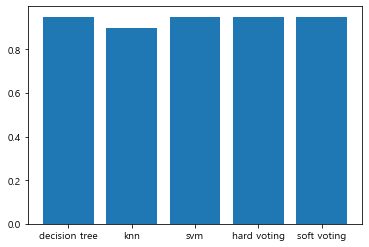

In [116]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                   accuracy_score(y_test, knn_predicted),
                   accuracy_score(y_test, svm_predicted),
                   accuracy_score(y_test, hard_voting_predicted),
                   accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);


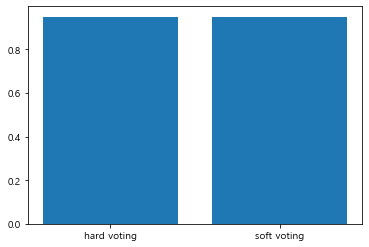

In [121]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(2)
plt.bar(x, height= [accuracy_score(y_test, hard_voting_predicted),
                   accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['hard voting','soft voting']);


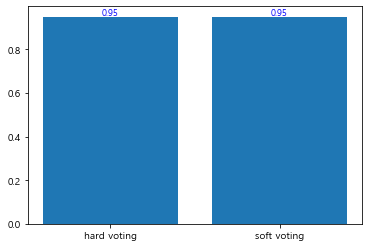

In [122]:
x = ['hard voting','soft voting']
y = [0.95,0.95]

import matplotlib.pyplot as plt

plt.bar(x,y)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

## 원하는 장소 3개를 넣어서, 맞추어 보자!

In [155]:
test_df1 = test_df.iloc[0:3]
test_df1

,longitude,latitude,label
0,126.854547,37.489853,Gangseo
1,126.859245,37.501394,Gangseo
2,126.847951,37.537759,Gangseo


In [162]:
test_df1[['label']]

,label
0,Gangseo
1,Gangseo
2,Gangseo


In [163]:
test_df1[['label']]['label']#시리즈로 바꿔 y_test1으로 지정해보자.

0    Gangseo
1    Gangseo
2    Gangseo
Name: label, dtype: object

In [166]:
type(test_df1[['label']]['label'])

pandas.core.series.Series

In [156]:
X_test1 = test_df1[['longitude', 'latitude']]
y_test1 = test_df1[['label']]['label']

In [157]:
X_test1.shape, y_test1.shape

((3, 2), (3,))

In [164]:
hard_voting_predicted = voting_clf1.predict(X_test1)
accuracy_score(y_test1, hard_voting_predicted)

1.0

In [165]:
soft_voting_predicted = voting_clf2.predict(X_test1)
accuracy_score(y_test1, soft_voting_predicted)

1.0